This notebook are explaining about step-by-step about how to predict a car value, this notebook are based on IBM data science certification from coursera course, this notebook content might do something unimportant or not to the point because i want to try something and analyze thing, i will gladly to hear some feedback to make this notebook better :)

<b>The Problem</b>

This notebook are inspired by how do we set a price for our car when we want to put a value for our car when we want to sell it based on some criteria available on the car.

The dataset are an old data collection about car, it's specification and it's sell price. Therefore, it may be not suitable if the dataset are used in these days

<b>Data Preparation Step</b>

Firstly first we need to import some library to help us analyzing our dataset

In [1]:
import pandas as pd
import numpy as np

We will upload dataset using pandas and store in in df, we will set the header to None because the dataset are not having a header

In [2]:
df = pd.read_csv("cars_prediciton.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


We will add header to the dataset

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Next, we need to find out wether there are null values or not in the dataset

In [4]:
def findNull(dataset):
    dataset.replace('?', np.nan, inplace=True)
    nullCount = dataset.isnull().sum()
    percent = dataset.isnull().sum() / dataset.isnull().count() * 100
    result = pd.concat([nullCount, percent], axis=1, keys=['null_count', 'percent'], sort=True)
    
    return result

findNull(df)

,null_count,percent
aspiration,0,0.00000
body-style,0,0.00000
bore,4,1.95122
city-mpg,0,0.00000
compression-ratio,0,0.00000
curb-weight,0,0.00000
drive-wheels,0,0.00000
engine-location,0,0.00000
engine-size,0,0.00000
engine-type,0,0.00000


There are some null value on the dataset, therefore we need to handle it by deleting or replacing the row with NaN value

We need to find out its statistical information and its datatype to help us making prediction easier and handling null value

In [5]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

We got mistype for some variable and need to fix it

In [6]:
df['bore'] = pd.to_numeric(df['bore'])
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'])
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'])
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [7]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,10.142537,104.256158,5125.369458,25.219512,30.751220
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,3.972040,39.714369,479.334560,6.542142,6.886443
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,23.000000,288.000000,6600.000000,49.000000,54.000000


For numerical, we will handle it by replacing the NaN value with the average value

In [8]:
avg = df['normalized-losses'].mean()
df['normalized-losses'].fillna(avg, inplace=True)
avg1 = df['bore'].mean()
df['bore'].fillna(avg1, inplace=True)
avg2 = df['horsepower'].mean()
df['horsepower'].fillna(avg2, inplace=True)
avg3 = df['peak-rpm'].mean()
df['peak-rpm'].fillna(avg3, inplace=True)
avg4 = df['bore'].mean()
df['bore'].fillna(avg4, inplace=True)

For num-of-doors which is categorical value, we will replace the nan value with its mode

In [9]:
mode = df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'] = df['num-of-doors'].fillna(mode)

For the rest, we will drop ow with NaN value

In [10]:
df.dropna(subset=['price'], axis=0, inplace=True)

To make sure we have handle the NaN value, we will check it once again

In [11]:
findNull(df)

,null_count,percent
aspiration,0,0.00000
body-style,0,0.00000
bore,0,0.00000
city-mpg,0,0.00000
compression-ratio,0,0.00000
curb-weight,0,0.00000
drive-wheels,0,0.00000
engine-location,0,0.00000
engine-size,0,0.00000
engine-type,0,0.00000


Now all the NaN value are handled, we can now process the data

In [12]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


Because we live in Indonesia and using Kilometer and Liter as standard, we will convert city-mpg column

In [13]:
df['cty-L/100km'] = 235 / df['city-mpg']

In [14]:
df['highway-L/100km'] = 235 / df['highway-mpg']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,cty-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500,12.368421,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950,9.791667,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450,13.055556,10.681818


In [15]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,cty-L/100km,highway-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,10.164279,103.405534,5117.665368,25.179104,30.686567,9.944145,8.044957
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,4.004965,37.365700,478.113805,6.423220,6.815150,2.534599,1.840739
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,7.000000,48.000000,4150.000000,13.000000,16.000000,4.795918,4.351852
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,8.600000,70.000000,4800.000000,19.000000,25.000000,7.833333,6.911765
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,9.000000,95.000000,5125.369458,24.000000,30.000000,9.791667,7.833333
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,9.400000,116.000000,5500.000000,30.000000,34.000000,12.368421,9.400000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,23.000000,262.000000,6600.000000,49.000000,54.000000,18.076923,14.687500


We will normalize some variable to easier to be used

In [16]:
df['length'] = df['length'] / df['length'].max()
df['width'] = df['width'] / df['width'].max()
df['height'] = df['height'] / df['height'].max()

df[['length', 'width', 'height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Now those variable will only have value in range between 0 to 1

We will create a binning for horsepower to create categorical value, we will divide it into 3 categorical value

In [17]:
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
group_name = ['Low', 'Medium', 'High']

In [18]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_name, include_lowest=True)
df['horsepower-binned'].head()

0       Low
1       Low
2    Medium
3       Low
4       Low
Name: horsepower-binned, dtype: category
Categories (3, object): [Low < Medium < High]

Let's visualize it

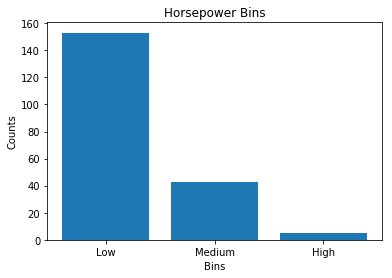

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(group_name, df['horsepower-binned'].value_counts())
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.title('Horsepower Bins')
plt.show()

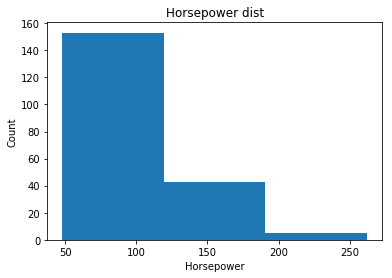

In [20]:
%matplotlib inline

plt.hist(df['horsepower'], bins=3)
plt.xlabel('Horsepower')
plt.ylabel('Count')
plt.title('Horsepower dist')
plt.show()

Prediction are only accept numerical and categorical data, therefore we need to convert variable to have accepted value such as fuel-type are need to be changed to numerical value

In [21]:
dummy_variable = pd.get_dummies(df['fuel-type'])
dummy_variable.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


After we changed the fuel-type data, we will add it into our dataset and drop the original fuel-type

In [22]:
df = pd.concat([df, dummy_variable], axis=1)
df.drop('fuel-type', axis=1, inplace=True)

We need to do the same thing to aspiration

In [23]:
dummy_variable1 = pd.get_dummies(df['aspiration'])
dummy_variable1.head()

df = pd.concat([df, dummy_variable1], axis=1)
df.drop('aspiration', axis=1, inplace=True)

In [24]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,cty-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495,11.190476,8.703704,Low,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500,11.190476,8.703704,Low,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500,12.368421,9.038462,Medium,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950,9.791667,7.833333,Low,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450,13.055556,10.681818,Low,0,1,1,0


The dataset now are clean and ready to be used, and from now on we will start thinking about prediciton and we need to import new library to assist us

<b>Explanatory Data Analysis</b>

In [25]:
import seaborn as sns

If we think logically, engine-size may affect the car price and to prove that we will visualize the correlation between engine-size and price, but bear in mind that correlation are not causation

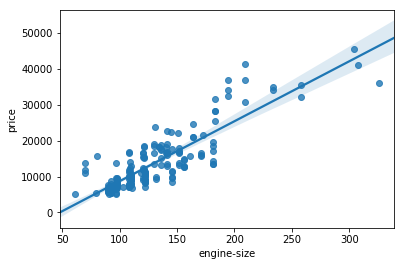

In [26]:
df['price'] = df['price'].astype('int')

sns.regplot(x='engine-size', y='price', data=df)

As the engine size higher, the price are also growing higher and the visual shows us it points to positive value and it might have high positive correlation, let's check their correlation

In [27]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


The correlation are achieving 87% which is high

highway mpg are potential predictor, lets visualize it and find its correlation

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


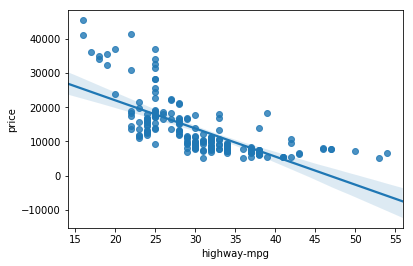

In [28]:
sns.regplot(x='highway-mpg', y='price', data=df)
df[['highway-mpg', 'price']].corr()

This shows us that they have negative correlation however it's close to -1 therefore it could be potential predictor

let's find another variable's corelation

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


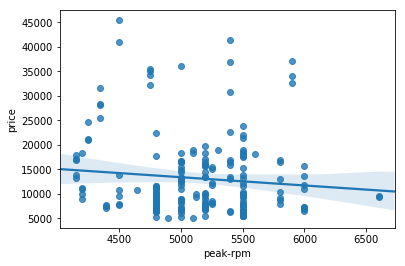

In [29]:
sns.regplot(x='peak-rpm', y='price', data=df)
df[['peak-rpm', 'price']].corr()

These variable have weak corelation with only 10% and these are not potential predictor

Categorical variable cannot be determined as a potential predictor using regression plot, we will use box plot

Let's see for body-style and price correlation

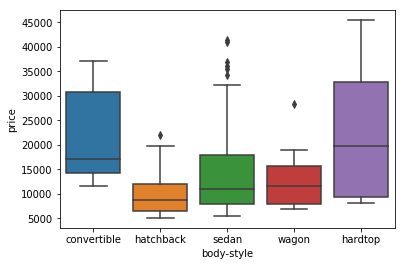

In [30]:
sns.boxplot(x='body-style', y='price', data=df)

body-style are not good predictor because there are significant overlap in the distribution

Now, we will find correlation between engine-location and price

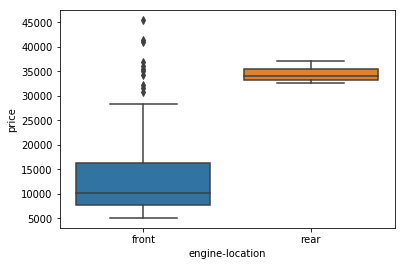

In [31]:
sns.boxplot(x='engine-location', y='price', data=df)

engine-location will be a good predictor for price because they have distinct distribution

Let's find correlation between drive-wheels and price

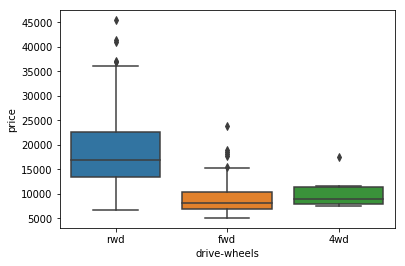

In [32]:
sns.boxplot(x='drive-wheels', y='price', data=df)

drive-wheels are also potential predictor for price

Now we will check the correlation and p-value to determine which variable that can be used as predictor

In [33]:
from scipy import stats

In [34]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732955e-20


wheel-base has correlation 58%, the relarionship isn't extremelly strong, althought the p-value are < 0.001 which is good

In [35]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P = 6.36905742825998e-48


horsepower has correlation 80% which is high and has p-value < 0.001 which also good

In [36]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483642  with a P-value of P = 8.016477466158713e-30


length has correlation 69% which is not very high and has p-value < 0.001 which is good

In [37]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.20033551048166e-38


width has correlation 75% which is high and has p-value < 0.001 which also good

In [38]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P = 2.1895772388936997e-53


curb-weight has correlation 83% which is high and has p-value < 0.001 which also good

In [39]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622197996e-64


engine-size has correlation 87% which is high and has p-value < 0.001 which also good

In [40]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P = 8.049189483935364e-17


bore has correlation 54% which is moderate and has p-value < 0.001 which good

In [41]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P = 2.3211320655676368e-29


city-mpg has correlation -68% which is negative high and has p-value < 0.001 which also good

In [42]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P = 1.7495471144476807e-31


highway-mpg has correlation 70% which is high and has p-value < 0.001 which also good

<b>Conclusion:</b>

We have some variable that important for our prediciton:

Continous Numerical:

<ol>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ol>

Categorical:
<ol><li>Drive-Wheel</li></ol>

<b>Modelling</b>

In modelling section, we will create model for our prediction using Simple Linear Regression, Multiple Linear Regression and Polynomial Regression

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()

Now let's try using simple linear regression by predicting price using highway-mpg 

In [45]:
X=df[['highway-mpg']]
Y=df['price']

lm.fit(X,Y)
Yhat = lm.predict(X)
coeff = lm.coef_
intercept = lm.intercept_
Yhat

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682, 14593.03788682, 15414.77126514,
       15414.77126514, 17879.97140011, 20345.17153508, 20345.17153508,
       21988.63829172, -5128.5631929 ,  3088.77059031,  3088.77059031,
        4732.23734696,  7197.43748192, 13771.3045085 ,  7197.43748192,
        7197.43748192,  7197.43748192, 13771.3045085 , 13771.3045085 ,
       18701.70477843, -5950.29657123,  7197.43748192,  3910.50396864,
       10484.37099521, 10484.37099521, 10484.37099521, 10484.37099521,
       11306.10437353, 11306.10437353, 11306.10437353, 11306.10437353,
       15414.77126514, 12949.57113018, 14593.03788682, 14593.03788682,
       22810.37167004, 22810.37167004, 24453.83842668, 12949.57113018,
        7197.43748192,  7197.43748192,  7197.43748192,  7197.43748192,
       19523.43815675, 19523.43815675, 19523.43815675, 19523.43815675,
      

Formula to predict price using Simple Liner Regression are

<center><b>Yhat = a + bx</b></center>

Where:

a = intercept

b = coefficient

x = data

We can implement this to our data

In [46]:
price = intercept + coeff * X
price.head()

,highway-mpg
0,16236.504643
1,16236.504643
2,17058.238022
3,13771.304508
4,20345.171535


The Yhat using sklearn.linear_model and using manual calculation are having simmilar output for prediction

Now we will try using Multiple Linear Regression for the prediction

In [47]:
Z =df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])

Yhat = lm.predict(Z)
Yhat

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097, 10722.32509097, 17804.80307397,
       18063.72662867, 19320.78745066, 26968.56492801, 27674.72007721,
       28191.0677239 ,   650.62317688,  5648.50489642,  5813.27443123,
        5478.81383232,  5370.64136587,  8739.61952024,  5799.04215638,
        5902.61157827,  5902.61157827,  9036.2046829 , 11863.43973759,
       18767.70667001,  4808.3090102 ,  5693.32889063,  4006.47212651,
        6118.73075572,  6194.05397163,  6448.26982534,  6514.17763926,
        9478.65495235,  9728.16310506,  9798.77861998, 10118.90228761,
       11178.86719942, 10423.81935057,  9463.46710755, 12626.61544369,
       34470.03895495, 34470.03895495, 43996.52260522,  5265.67702191,
        5565.15645357,  5588.69495854,  5777.00299832,  5800.5415033 ,
        7337.21461795,  7337.21461795,  7360.75312292, 10536.2966792 ,
      

The formula for Multiple Linear Regression are a bit complex where:
$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

Therefore, i will skip the implementation in our code

<b>Model Evaluation</b>

We will evaluatin our simple linear regression model by visualize it using regression plot

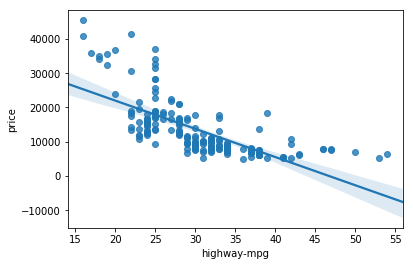

In [48]:
sns.regplot(x='highway-mpg', y='price', data=df)

We got negative price when highway-mpg reach 55, this is happen when the slop(coeff) are negative, we need to find out the variance of the data wether the data is best fit for linear or not by using residual plot

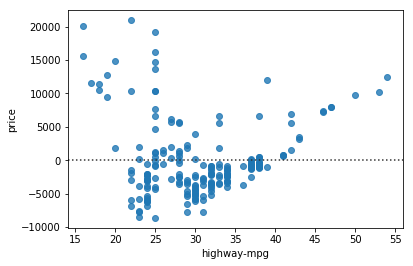

In [49]:
sns.residplot(x='highway-mpg', y='price', data=df)

We can see that the data are not randomly spread and this might not fit for our linear model, we will try to use polynomial fit in 3rd order to solve this

In [50]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [51]:
X = df['highway-mpg']

f = np.polyfit(X, Y, 3)
p = np.poly1d(f)

Let's plot the visual

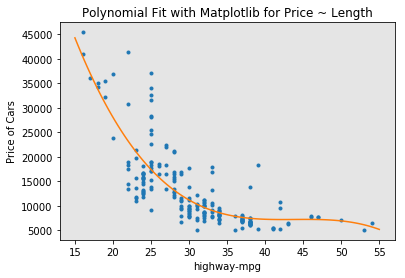

In [52]:
PlotPolly(p, X, Y, 'highway-mpg')

The visual shows that polynomial are better that simple linear regression because it hits more on the data points

To evaluate multple linear regression, we need to use distribution plot because we cannot use residual plot for MLR

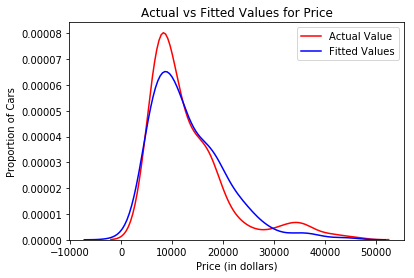

In [53]:
ax = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

Lets use polynomial transformation on our Z

In [54]:
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree=2)

In [55]:
Z_pr = pr.fit_transform(Z)

Lets compre Z and transformed Z

In [56]:
Z.shape

(201, 4)

In [57]:
Z_pr.shape

(201, 15)

To decide which model are perform better we need to check the R^2 and the MSE

In [58]:
from sklearn.metrics import mean_squared_error

1.Simple Linear Regression

In [59]:
X = df[['highway-mpg']]

lm.fit(X, Y)
print('R square: ', lm.score(X, Y))

Yhat = lm.predict(X)
mse = mean_squared_error(df['price'], Yhat)
print('MSE: ', mse)

R square:  0.4965911884339175
MSE:  31635042.944639895


2.Multiple Linear Regression

In [60]:
lm.fit(Z, df['price'])
print('R square: ', lm.score(Z, df['price']))

Yhat = lm.predict(Z)
mse = mean_squared_error(df['price'], Yhat)
print('MSE: ', mse)

R square:  0.8093562806577457
MSE:  11980366.87072649


3.Polynomial fit

In [61]:
from sklearn.metrics import r2_score

x = df['highway-mpg']

r_squared = r2_score(Y, p(x))
print('R square: ', r_squared)

mse = mean_squared_error(df['price'], p(x))
print('MSE: ', mse)

R square:  0.6741946663906513
MSE:  20474146.42636125


<b>Decision</b>

To decide which model are bette, we need to compare its MSE and R^2, the biggest R^2 are better and the lesser MSE are better, after we check each model we know that <b>Multiple Linear Regression are better</b>

<b>Prediction example</b>

This is an example about how to predict by using Simple Linear Regression

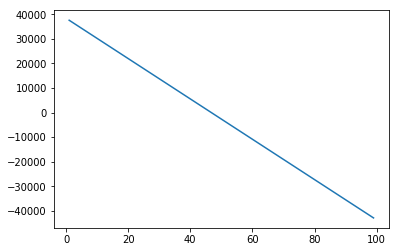

In [62]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

lm.fit(X, Y)
yhat=lm.predict(new_input)

plt.plot(new_input, yhat)
plt.show()

<b> This is The end of the notebook</b> thanks for reading and hope you enjoy it :)